<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus for Machine Learning(Integrals and Optimization)

**Undersatnding Integrals and their Applications in ML**
- What are Integrals?
  - Compute the area under a curve, representing accumulation
  
  - The defineintegrak of f(x) from a to b:

  $\int_{a}^{b} f(x)\, dx$

- Applications in ML
  
  - Probability Distributions
  
  - Cost Functions

In [ ]:
import sympy as sp
x = sp.Symbol('x')
f = x**2
definite_integral = sp.integrate(f, (x, 0, 2))
indefinite_integral = sp.integrate(f, x)
print("Definite Integral: \n", definite_integral)
print("Indefinite Integral: \n", indefinite_integral)

Definite Integral: 
 8/3
Indefinite Integral: 
 x**3/3


**Optimization concepts**
- Local vs Global Minima

  - Local Minimum

  - Global Minimum

- Convex Functions

  - A function is **convex** if it satisfies:

$f(\lambda x_1 + (1 - \lambda)x_2) \le \lambda f(x_1) + (1 - \lambda) f(x_2)$ for all $x_1, x_2$ and $\lambda \in [0, 1]$

  - Ensures that any local minimum is also a Global Minimum

- Non-Convex Functions in ML

  - Most Neural Network loss Functions


**Stochastic Gradient Descent (SGD) And it's Variants**

- What is Stochastic Gradient Descent?
  - Optimization algorithm that uses random subsets(mini-batches) of the data to compute Gradients and update parameters
- Why use SGD?
  
- Variants of SGD

  - Mini-Batch SGD

  - Momentum

  - Adam Optimizer

**Exercise 1 :- Calculate Integrals of simple Functions**

In [ ]:
import sympy as sp
# Define a Function
x = sp.Symbol('x')
f = sp.exp(-x)
# Compute Indefinite Integral
indefinite_integral = sp.integrate(f, x)
print("Indefinite Integral: \n", indefinite_integral)
# Compute definite Integral
definite_integral = sp.integrate(f, (x, 0, sp.oo))
print("Definite Integral: \n", definite_integral)

Indefinite Integral: 
 -exp(-x)
Definite Integral: 
 1


**Exercise 2 :- Implement stochastic Gradient Descent for a Linear Regression Model**

In [ ]:
import numpy as np
# Generate Synthetic Data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# Add Bias term to x
X_b = np.c_[np.ones((100, 1)), X]
# SGD Implementation
def stochastic_gradient_descent(X, y, theta, learning_rate, n_epochs):
  m = len(y)
  for epoch in range(n_epochs):
    for i in range(m):
      random_index = np.random.randint(m)
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      gradients = 2 * xi.T @ (xi @ theta - yi)
      theta = theta - learning_rate * gradients
  return theta
# Initialize paramters
theta = np.random.randn(2, 1)
learning_rate = 0.01
n_epochs = 50
# Perform SGD
theta_opt = stochastic_gradient_descent(X_b, y, theta, learning_rate, n_epochs)
print("Optimized Parameters: \n", theta_opt)


Optimized Parameters: 
 [[4.17496955]
 [3.09974345]]


**additional Practice**
 > 1.Visualize the loss function's surface and the SGD optimization path


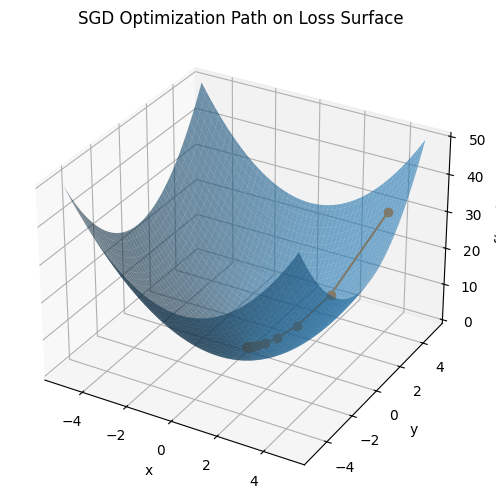

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Loss function
def f(x, y):
    return x**2 + y**2
# Gradient of the loss function
def grad(x, y):
    return np.array([2*x, 2*y])
# SGD settings
lr = 0.2          # learning rate
steps = 20        # number of iterations
point = np.array([4.0, 4.0])   # starting point
path = [point.copy()]          # to store all steps
# Perform SGD iterations
for i in range(steps):
    g = grad(point[0], point[1])
    point = point - lr * g
    path.append(point.copy())
path = np.array(path)
# Create grid for loss surface
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)
# Plot 3D surface
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
# Surface plot
ax.plot_surface(X, Y, Z, alpha=0.6)
# SGD path
ax.plot(path[:,0], path[:,1], f(path[:,0], path[:,1]), marker='o')
# Labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('SGD Optimization Path on Loss Surface')
plt.show()

> 2. Implement Mini-Batch SGD and compare it with vanilla SGD

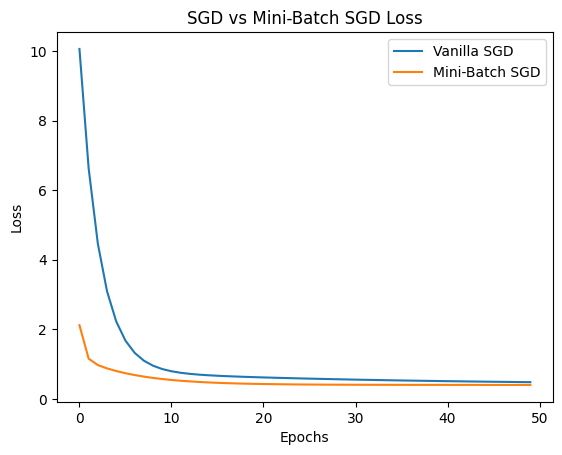

Vanilla SGD theta: 
 [3.48928119 3.41092085]
Mini-Batch SGD theta: 
 [4.18238523 2.80051043]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Seed for reproducibility
np.random.seed(42)
# Generate data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise
# Add bias term
X_b = np.c_[np.ones((100, 1)), X]  # X with bias
def compute_loss(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss
def vanilla_sgd(X, y, lr=0.1, n_epochs=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    losses = []
    for epoch in range(n_epochs):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - lr * gradients
        loss = compute_loss(theta, X, y)
        losses.append(loss)
    return theta, losses
def mini_batch_sgd(X, y, batch_size=20, lr=0.1, n_epochs=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    losses = []
    for epoch in range(n_epochs):
        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            gradients = (1/len(X_batch)) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta = theta - lr * gradients
        # Compute loss after each epoch
        loss = compute_loss(theta, X, y)
        losses.append(loss)
    return theta, losses
# Vanilla SGD
theta_vanilla, loss_vanilla = vanilla_sgd(X_b, y)
# Mini-Batch SGD
theta_mini, loss_mini = mini_batch_sgd(X_b, y, batch_size=20)
# Plot loss curves
plt.plot(loss_vanilla, label='Vanilla SGD')
plt.plot(loss_mini, label='Mini-Batch SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Mini-Batch SGD Loss')
plt.legend()
plt.show()
# Print final parameters
print("Vanilla SGD theta: \n", theta_vanilla.ravel())
print("Mini-Batch SGD theta: \n", theta_mini.ravel())


> 3. Use Adam Optimizer for a more complex dataset

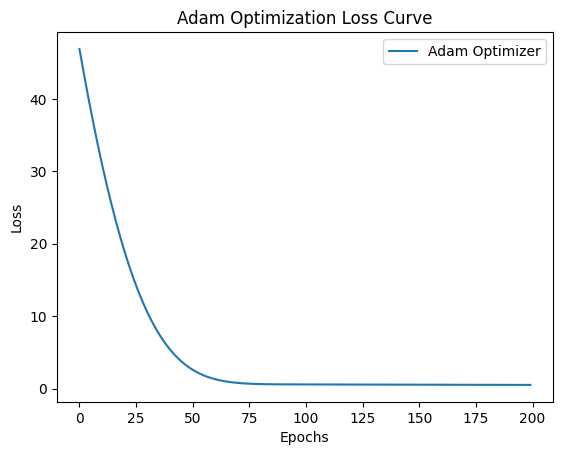

Learned parameters: 
 [3.90412683 2.46796017 2.43162035]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
# Features
X = 2 * np.random.rand(200, 1)
# Target (non-linear)
y = 4 + 3 * X + 2 * X**2 + np.random.randn(200, 1)
# Add bias term
X_b = np.c_[np.ones((200, 1)), X, X**2]  # polynomial features for complexity
def compute_loss(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss
def adam_optimizer(X, y, lr=0.05, n_epochs=200, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))
    losses = []
    for t in range(1, n_epochs + 1):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        # Update biased first moment estimate
        m_t = beta1 * m_t + (1 - beta1) * gradients
        # Update biased second raw moment estimate
        v_t = beta2 * v_t + (1 - beta2) * (gradients**2)
        # Compute bias-corrected estimates
        m_hat = m_t / (1 - beta1**t)
        v_hat = v_t / (1 - beta2**t)
        # Update parameters
        theta = theta - lr * m_hat / (np.sqrt(v_hat) + epsilon)
        # Save loss
        loss = compute_loss(theta, X, y)
        losses.append(loss)
    return theta, losses
theta_adam, loss_adam = adam_optimizer(X_b, y)
# Plot loss curve
plt.plot(loss_adam, label='Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Adam Optimization Loss Curve')
plt.legend()
plt.show()
# Print learned parameters
print("Learned parameters: \n", theta_adam.ravel())
